In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load the dataset
data = pd.read_csv('spam.csv', encoding='latin1')
data = data[['v1', 'v2']]  # Assuming 'v1' is the label and 'v2' is the email text
data.columns = ['Label', 'EmailText']
# Display the first few rows
print(data.head())

  Label                                          EmailText
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
# Preprocessing
data['Label'] = data['Label'].map({'ham': 0, 'spam': 1})  # Convert labels to binary
X = data['EmailText']
y = data['Label']



In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Convert text data to numerical format using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test_vec)

In [ ]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9838565022421525
Confusion Matrix:
 [[959   6]
 [ 12 138]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



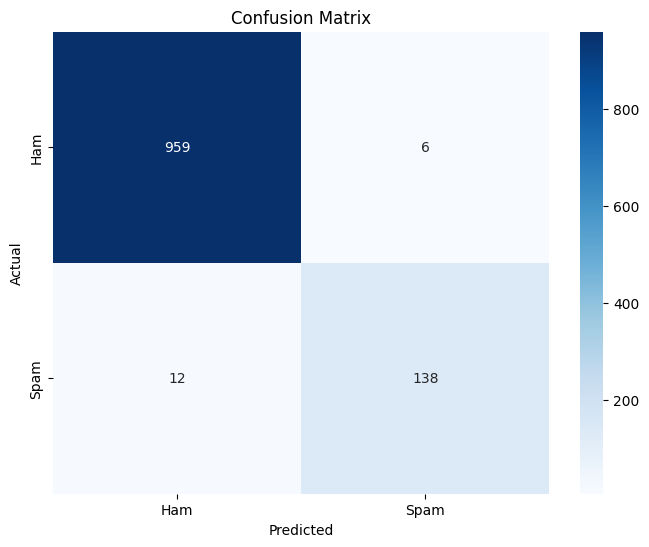

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Function to classify a single email
def classify_email(email_content):
    # Use the same vectorizer trained during the model training phase
    email_vectorized = vectorizer.transform([email_content])  # Preprocess the email
    prediction = model.predict(email_vectorized)  # Predict
    return "Spam" if prediction[0] == 1 else "Ham"

# Test the model with a new email
print("\n--- Email Spam Classification ---")
new_email = input("Enter the email content: ")

# Predict and display the result
result = classify_email(new_email)
print(f"The email is classified as: {result}")



--- Email Spam Classification ---
Enter the email content: Congratulations! You have won a free prize.
The email is classified as: Spam


In [1]:
# Configure Git
!git config --global user.name "pragy19"
!git config --global user.email "pragyparihar19@gmail.com"


In [2]:
!git clone https://github.com/pragy19/Email-Spam-Classifier.git

Cloning into 'Email-Spam-Classifier'...


In [ ]:
!cp /path_to_your_files/* .
